# Exploring Movie Dataset (1975-2018)

In this notebook we will look at the dataset, visualize it and try to find correlations between them.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  LOADING THE DATA

In [12]:
data = pd.read_csv("C:\\Users\\risha\\Desktop\\ml\\blockbusters.csv")

In [13]:
data

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
...,...,...,...,...,...,...,...,...,...,...,...
432,Thriller,Crime,Comedy,7.1,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"$41,833,347.00",1975
433,Music,Drama,Comedy,6.4,136,7,PG,Columbia Pictures,Funny Lady,"$39,000,000.00",1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"$36,853,000.00",1975
435,Drama,NaN,NaN,6.0,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","$35,000,000.00",1975


# DATA EXPLORATION

In [14]:
data.head(10)

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
5,Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,"$220,159,104",2018
6,Action,Comedy,NaN,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
7,Action,Adventure,Drama,7.0,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
8,Action,Adventure,Drama,6.9,112,9,PG-13,Columbia Pictures,Venom,"$213,030,843",2018
9,Music,Drama,NaN,8.1,135,10,R,Warner Bros,A Star is Born,"$199,721,727",2018


In [15]:
data.shape

(437, 11)

# The dataset contains 437 rows and 11 columns.


In [17]:
data.isnull().sum()

Main_Genre           0
Genre_2             29
Genre_3            141
imdb_rating          0
length               0
rank_in_year         0
rating               0
studio               0
title                0
worldwide_gross      0
year                 0
dtype: int64

# We observe that there are some rows with missing values. "Genre_2" and "Genre_3" have 29 and 141 missing values respectively. 


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Main_Genre       437 non-null    object 
 1   Genre_2          408 non-null    object 
 2   Genre_3          296 non-null    object 
 3   imdb_rating      437 non-null    float64
 4   length           437 non-null    int64  
 5   rank_in_year     437 non-null    int64  
 6   rating           437 non-null    object 
 7   studio           437 non-null    object 
 8   title            437 non-null    object 
 9   worldwide_gross  437 non-null    object 
 10  year             437 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 37.7+ KB


# We observe that the worldwide_gross has "$" due to which it is not a numerical value.

In [20]:
data["worldwide_gross"] = data["worldwide_gross"].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\risha\AppData\Local\Temp\ipykernel_18208\2291265317.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["worldwide_gross"] = data["worldwide_gross"].str.replace('$', '').str.replace(',', '').astype(float)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Main_Genre       437 non-null    object 
 1   Genre_2          408 non-null    object 
 2   Genre_3          296 non-null    object 
 3   imdb_rating      437 non-null    float64
 4   length           437 non-null    int64  
 5   rank_in_year     437 non-null    int64  
 6   rating           437 non-null    object 
 7   studio           437 non-null    object 
 8   title            437 non-null    object 
 9   worldwide_gross  437 non-null    float64
 10  year             437 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 37.7+ KB


This step was just to confirm that the dataframe was updated.

In [22]:
data.describe()

,imdb_rating,length,rank_in_year,worldwide_gross,year
count,437.000000,437.000000,437.000000,4.370000e+02,437.000000
mean,7.076659,119.871854,5.524027,3.902409e+08,1996.647597
std,0.820273,22.744332,2.869884,3.158344e+08,12.630396
min,4.400000,27.000000,1.000000,3.467310e+07,1975.000000
25%,6.500000,103.000000,3.000000,1.239224e+08,1986.000000
50%,7.100000,118.000000,6.000000,3.342011e+08,1997.000000
75%,7.700000,134.000000,8.000000,5.537098e+08,2008.000000
max,9.000000,201.000000,10.000000,2.749064e+09,2018.000000


# DATA VISUALIZATION

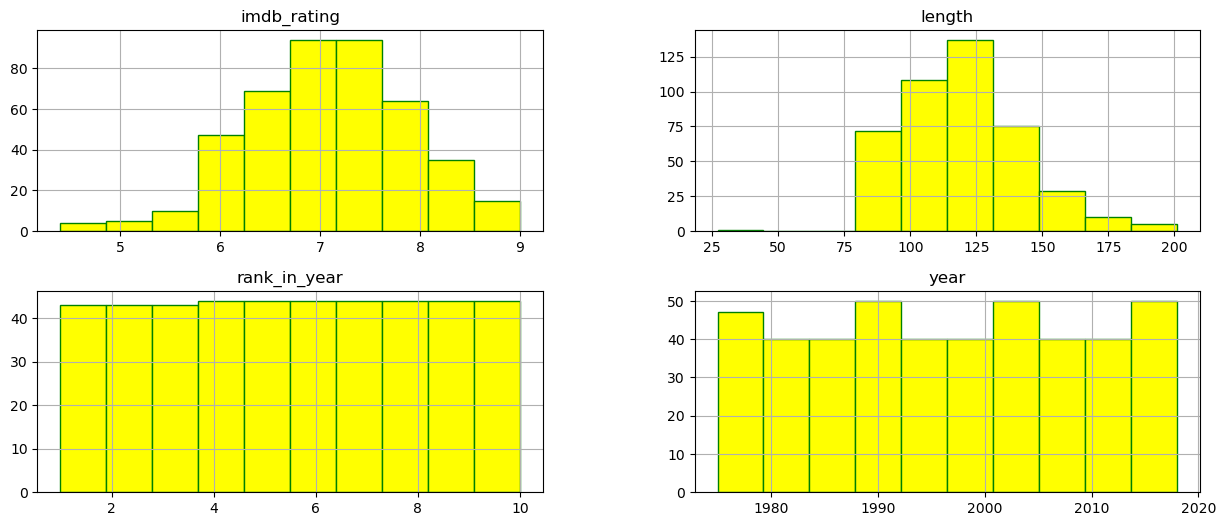

In [10]:
columns = ['imdb_rating','length','rank_in_year','year']
data[columns].hist(figsize = (15, 6), color = 'yellow', edgecolor = 'green', layout = (2, 2));

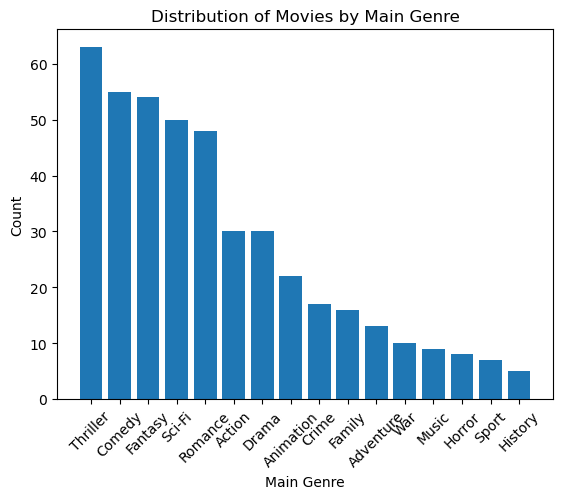

In [31]:
count1 = data["Main_Genre"].value_counts()
plt.bar(count1.index, count1.values)
plt.xticks(rotation=45)
plt.title("Distribution of Movies by Main Genre")
plt.xlabel("Main Genre")
plt.ylabel("Count")
plt.show()

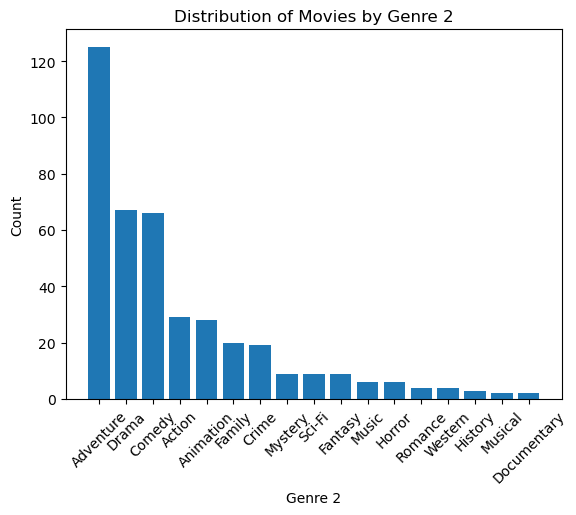

In [34]:
count2 = data["Genre_2"].value_counts()
plt.bar(count2.index, count2.values)
plt.xticks(rotation=45)
plt.title("Distribution of Movies by Genre 2")
plt.xlabel("Genre 2")
plt.ylabel("Count")
plt.show()

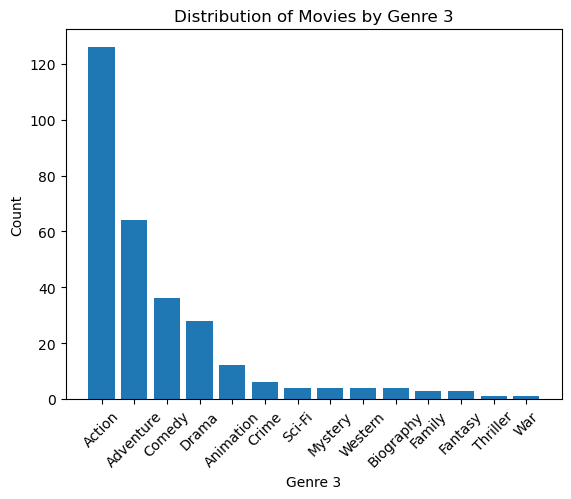

In [40]:
count3= data["Genre_3"].value_counts()
plt.bar(count3.index,count3.values)
plt.xticks(rotation=45)
plt.title("Distribution of Movies by Genre 3")
plt.xlabel("Genre 3")
plt.ylabel("Count")
plt.show()

# We infer that the most movies in the dataset belonged to Action, Adventure and Thriller Genre

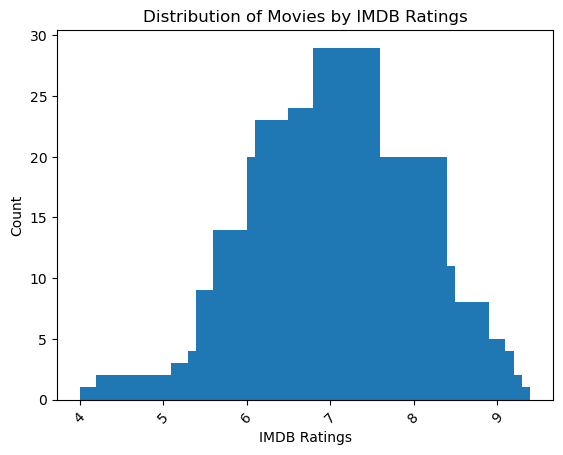

In [42]:
count4 = data["imdb_rating"].value_counts()
plt.bar(count4.index, count4.values)
plt.xticks(rotation=45)
plt.title("Distribution of Movies by IMDB Ratings")
plt.xlabel("IMDB Ratings")
plt.ylabel("Count")
plt.show()

# We can infere that most movies belonged to an average range of 6.8 - 7.5 IMDB Rating.

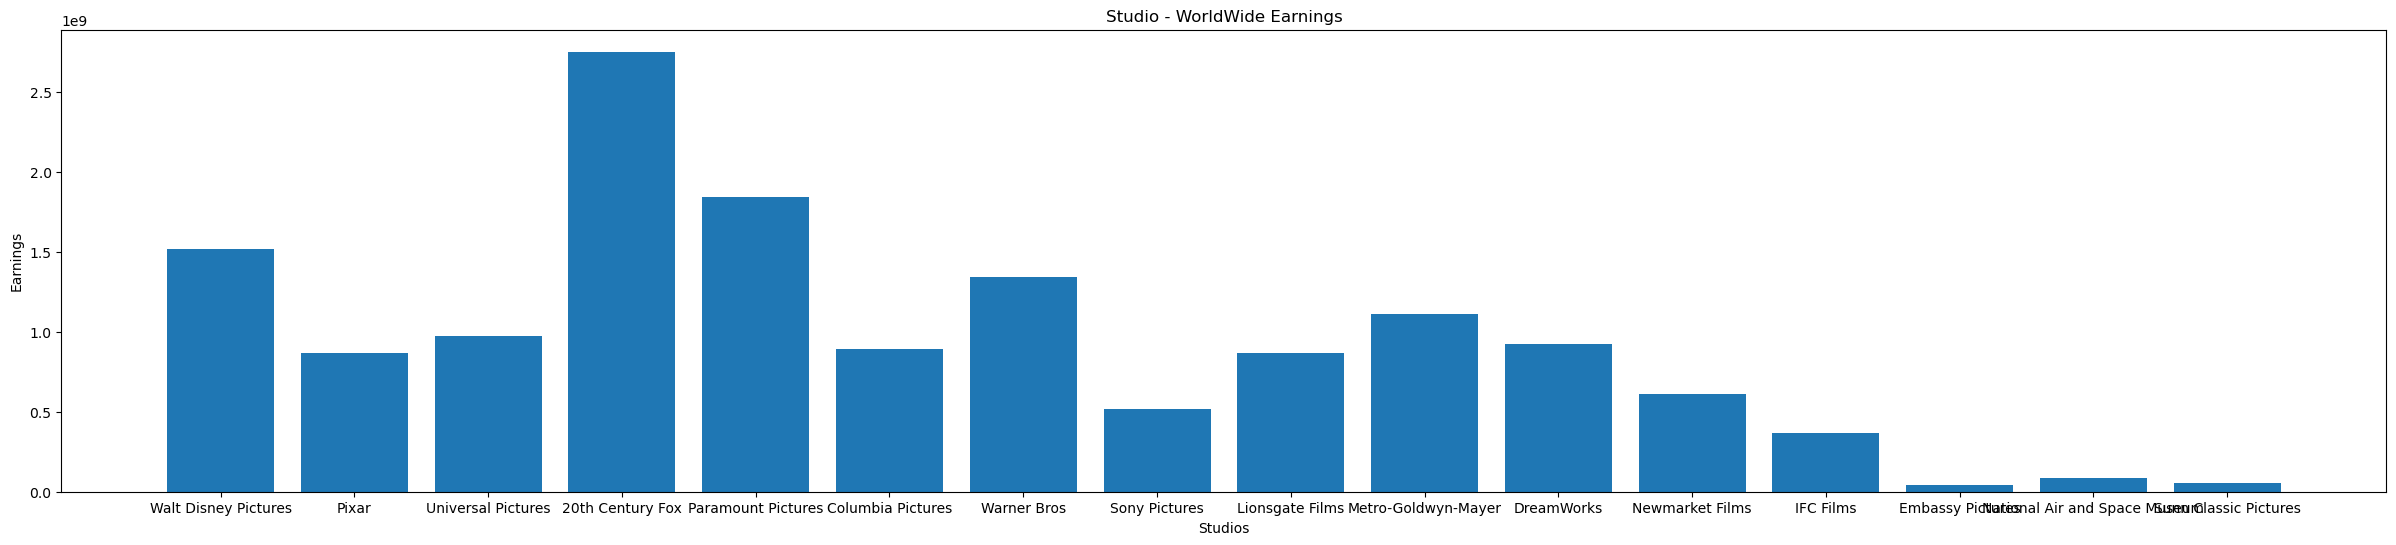

In [57]:
plt.figure(figsize=(30,6))
plt.bar(data["studio"], data["worldwide_gross"])
plt.title("Studio - WorldWide Earnings")
plt.xlabel("Studios")
plt.ylabel("Earnings")
plt.show()

# We Infer that 20th Century Fox Studios have the highest grossing.

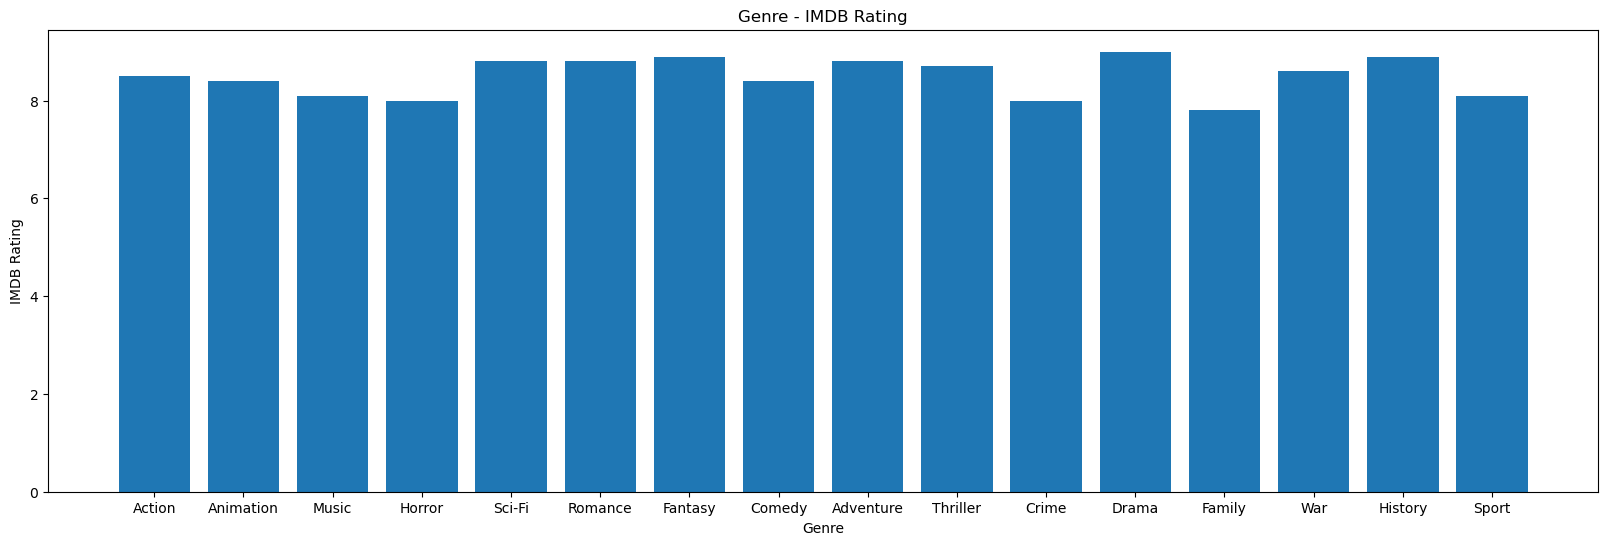

In [49]:
plt.figure(figsize=(20,6))
plt.bar(data["Main_Genre"], data["imdb_rating"])
plt.title("Genre - IMDB Rating")
plt.xlabel("Genre")
plt.ylabel("IMDB Rating")
plt.show()